In [14]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [15]:
def linesSplit(lines):
    column_len = len(lines[0].split())
    dataset = np.zeros([len(lines), column_len])
    for row, l in enumerate(lines):
        for col in range(column_len):
            dataset[row, col] = l.split()[col]

    return dataset

def load_dataset(load_file):
    file = open(load_file, 'r')
    lines = file.read().split('\n')[:-1]
    dataset = linesSplit(lines)
    file.close
    
    return dataset 

X_train = load_dataset('X_train.out')
y_train = load_dataset('y_train.out')
X_test = load_dataset('X_test.out')
y_train = y_train.reshape([-1])

# 返回各個類別的索引值集合
class_0_idx = [k for k,_ in enumerate(y_train) if _==0]
class_1_idx = [k for k,_ in enumerate(y_train) if _==1]
class_2_idx = [k for k,_ in enumerate(y_train) if _==2]

In [16]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient_descent(X, yt, lr=0.01, iter=100):
    X = np.c_[X, np.ones(X.shape[0])]
    W = np.random.uniform(low=-0.01, high=0.01, size=3)
    for times in range(iter):
        dW = np.array([0, 0, 0], dtype=np.float)
        for idx, t in enumerate(X):
            o = 0
            for j in range(3):
                o = o + W[j] * t[j]
            y = sigmoid(o)
            for j in range(3):
                dW[j] = dW[j] + (float)(yt[idx] - y) * t[j]
        for j in range(3):
            W[j] = W[j] + lr * dW[j]
    
    return W

# 標籤0 V.S. 標籤1+標籤2

In [17]:
y0_12 = np.copy(y_train)
y0_12[class_2_idx] = 1
W0_12 = gradient_descent(X_train, y0_12, 0.1, 100)

# 標籤0+標籤1 V.S. 標籤2

In [18]:
y01_2 = np.copy(y_train)
y01_2[class_1_idx] = 0
y01_2[class_2_idx] = 1
W01_2 = gradient_descent(X_train, y01_2, 0.01, 100)

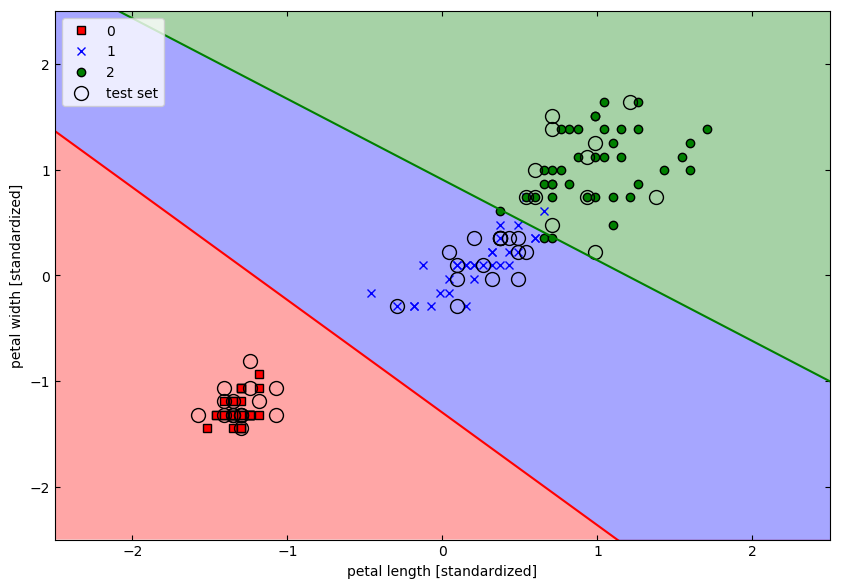

In [19]:
def get_x2(W, x1):
    x2 = -(W[2] + W[0] * x1) / W[1]
    
    return x2

fig = plt.figure(figsize=(10,7), dpi=100)
ax = fig.add_subplot(111)
plt.plot(X_train[class_0_idx,0], X_train[class_0_idx,1], 'rs', mec='k')
plt.plot(X_train[class_1_idx,0], X_train[class_1_idx,1], 'bx')
plt.plot(X_train[class_2_idx,0], X_train[class_2_idx,1], 'go', mec='k')
plt.plot(X_test[:,0], X_test[:,1], 'o', mec='k', ms=10, markerfacecolor="None")

# Plot decision boundary
x = np.arange(-2.5,2.6, 0.01)
x20 = get_x2(W0_12,x)
x21 = get_x2(W01_2,x)
plt.plot(x, x20, 'r')
plt.plot(x, x21, 'g')

plt.fill_between(x, -2.5, x20, facecolor='r', alpha=0.35)
plt.fill_between(x, x20, x21, facecolor='b', alpha=0.35)
plt.fill_between(x, 2.5, x21, facecolor='g', alpha=0.35)

plt.xlim([-2.5, 2.5])
plt.ylim([-2.5, 2.5])
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
ax.tick_params(direction='in', top=True, right=True)
plt.legend(['0', '1', '2', 'test set'], loc=2)
plt.show()